In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import itertools
import streamlit as st
from sklearn.model_selection import train_test_split, GridSearchCV
from bs4 import BeautifulSoup
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:


# URL de la página web que contiene la tabla de los clubes chilenos
url = 'https://campeonatochileno.cl/estadisticas'

# Realizar una solicitud a la página
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Analizar el contenido HTML de la página
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Buscar la tabla en el contenido
    table = soup.find('table')
    
    # Extraer los datos de la tabla
    rows = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        rows.append(cols)
    
    # Crear un DataFrame de pandas con los datos extraídos
    df = pd.DataFrame(rows)
    
    # Guardar el DataFrame en un archivo CSV
    df.to_csv('cam_chile.csv', index=False, header=False)  # Puedes modificar index y header según sea necesario



In [3]:
#Visualizando los datos de la página web
df_cam=pd.read_csv("cam_chile.csv")
df_cam

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Colo-Colo\nCC,63,28,20,3,5,45,20,25,NaN
1,2,Universidad de Chile\nUCH,61,28,18,7,3,48,22,26,NaN
2,3,Unión Española\nUE,45,28,13,6,9,51,40,11,NaN
3,4,Universidad Católica\nUC,45,28,13,6,9,41,30,11,NaN
4,5,Deportes Iquique\nCDI,45,28,13,6,9,51,45,6,NaN
5,6,Everton\nEVE,41,28,11,8,9,45,40,5,NaN
6,7,Coquimbo Unido\nCOQ,41,28,11,8,9,35,33,2,NaN
7,8,Palestino\nPAL,40,28,11,7,10,41,31,10,NaN
8,9,Ñublense\nÑUB,40,28,11,7,10,39,29,10,NaN
9,10,Audax Italiano\nAI,31,28,9,4,15,32,36,-4,NaN


In [4]:
#Eliminando la columna 0
df_cam.drop(columns=["Unnamed: 0"], inplace = True)
df_cam

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Colo-Colo\nCC,63,28,20,3,5,45,20,25,NaN
1,Universidad de Chile\nUCH,61,28,18,7,3,48,22,26,NaN
2,Unión Española\nUE,45,28,13,6,9,51,40,11,NaN
3,Universidad Católica\nUC,45,28,13,6,9,41,30,11,NaN
4,Deportes Iquique\nCDI,45,28,13,6,9,51,45,6,NaN
5,Everton\nEVE,41,28,11,8,9,45,40,5,NaN
6,Coquimbo Unido\nCOQ,41,28,11,8,9,35,33,2,NaN
7,Palestino\nPAL,40,28,11,7,10,41,31,10,NaN
8,Ñublense\nÑUB,40,28,11,7,10,39,29,10,NaN
9,Audax Italiano\nAI,31,28,9,4,15,32,36,-4,NaN


In [5]:
#Renombrando las columnas
#pj= partidos jugados, pg= partidos ganados, pe=partidos empatados, pp=partidos perdidos, gf=goles a favor, gc= goles en contra, dif=diferencia de goles 
df_cam=df_cam.rename(columns={"Unnamed: 1": "club",  "Unnamed: 2": "puntos", "Unnamed: 3": "pj", "Unnamed: 4": "pg", "Unnamed: 5": "pe", "Unnamed: 6": "pp", "Unnamed: 7": "gf", "Unnamed: 8": "gc", "Unnamed: 9": "dif"})
df_cam

,club,puntos,pj,pg,pe,pp,gf,gc,dif,Unnamed: 10
0,Colo-Colo\nCC,63,28,20,3,5,45,20,25,NaN
1,Universidad de Chile\nUCH,61,28,18,7,3,48,22,26,NaN
2,Unión Española\nUE,45,28,13,6,9,51,40,11,NaN
3,Universidad Católica\nUC,45,28,13,6,9,41,30,11,NaN
4,Deportes Iquique\nCDI,45,28,13,6,9,51,45,6,NaN
5,Everton\nEVE,41,28,11,8,9,45,40,5,NaN
6,Coquimbo Unido\nCOQ,41,28,11,8,9,35,33,2,NaN
7,Palestino\nPAL,40,28,11,7,10,41,31,10,NaN
8,Ñublense\nÑUB,40,28,11,7,10,39,29,10,NaN
9,Audax Italiano\nAI,31,28,9,4,15,32,36,-4,NaN


In [6]:
#eliminando la columna 10
df_cam.drop(columns=["Unnamed: 10"], inplace = True)
df_cam

,club,puntos,pj,pg,pe,pp,gf,gc,dif
0,Colo-Colo\nCC,63,28,20,3,5,45,20,25
1,Universidad de Chile\nUCH,61,28,18,7,3,48,22,26
2,Unión Española\nUE,45,28,13,6,9,51,40,11
3,Universidad Católica\nUC,45,28,13,6,9,41,30,11
4,Deportes Iquique\nCDI,45,28,13,6,9,51,45,6
5,Everton\nEVE,41,28,11,8,9,45,40,5
6,Coquimbo Unido\nCOQ,41,28,11,8,9,35,33,2
7,Palestino\nPAL,40,28,11,7,10,41,31,10
8,Ñublense\nÑUB,40,28,11,7,10,39,29,10
9,Audax Italiano\nAI,31,28,9,4,15,32,36,-4


In [7]:
#datos estadísticos
df_cam.describe()

,puntos,pj,pg,pe,pp,gf,gc,dif
count,16.000000,16.0,16.000000,16.0,16.000000,16.000000,16.000000,16.000000
mean,39.000000,28.0,11.000000,6.0,11.000000,38.687500,38.687500,0.000000
std,11.349009,0.0,3.777124,2.0,4.131182,8.097067,11.109868,16.091406
min,23.000000,28.0,7.000000,2.0,3.000000,26.000000,20.000000,-32.000000
25%,30.750000,28.0,8.000000,5.5,9.000000,32.750000,30.750000,-14.000000
50%,40.000000,28.0,11.000000,6.5,10.000000,39.000000,40.000000,3.500000
75%,45.000000,28.0,13.000000,7.0,13.250000,45.000000,45.500000,10.250000
max,63.000000,28.0,20.000000,9.0,19.000000,51.000000,60.000000,26.000000


Text(0.5, 1.0, 'Campeonato Nacional')

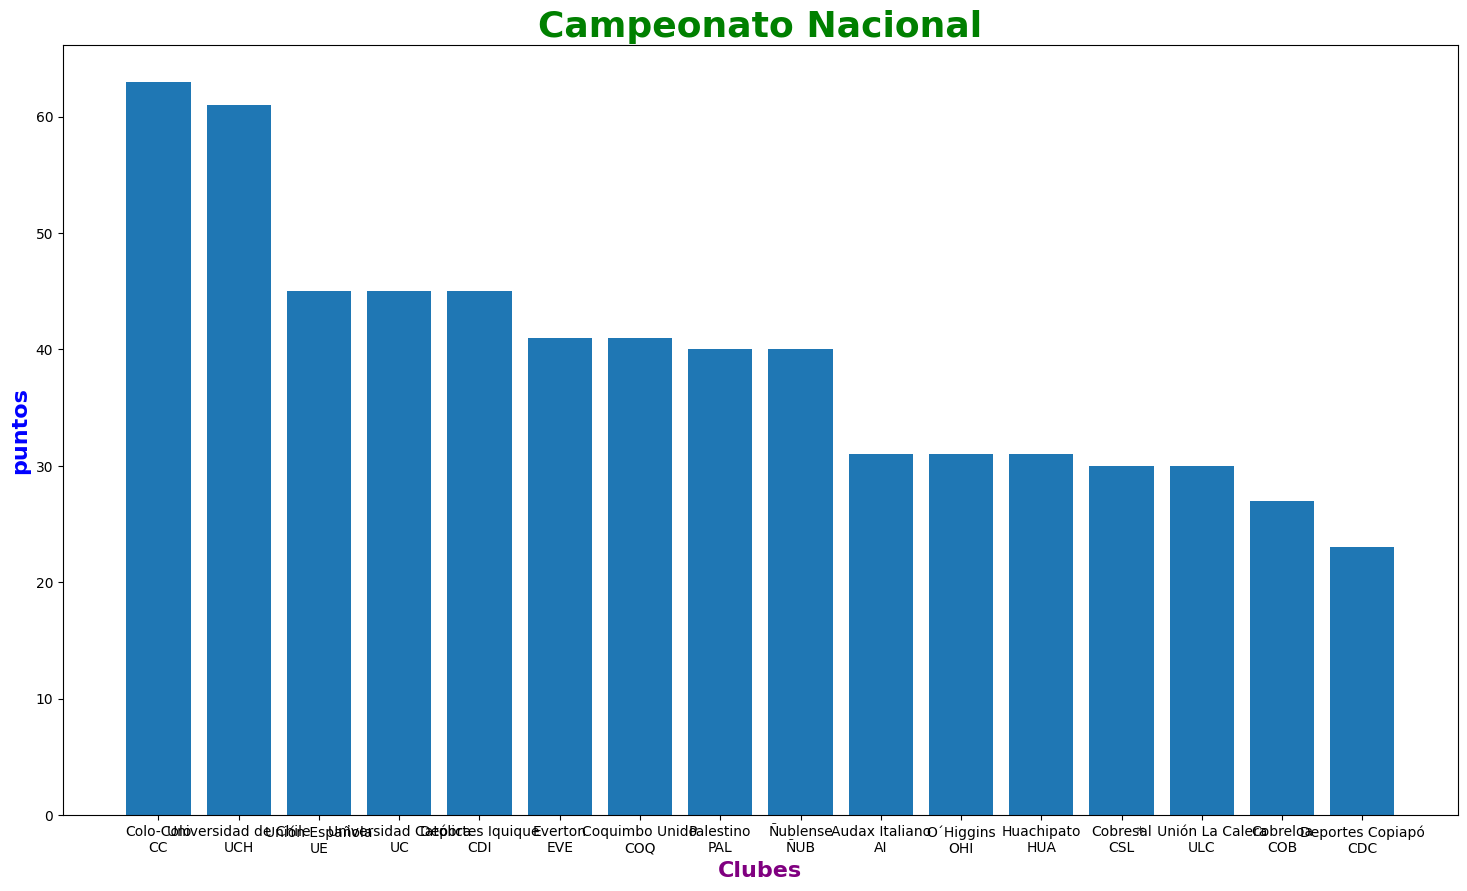

In [8]:
#gráfico de barras de los puntos ganados
plt.figure(figsize=(18, 10))
plt.bar(df_cam["club"], df_cam["puntos"])
plt.xlabel('Clubes', color='purple', fontsize=16, fontweight='bold')
plt.ylabel('puntos', color='b', fontsize=16, fontweight='bold')
plt.title('Campeonato Nacional', color='g', fontsize=26, fontweight='bold')

Text(0.5, 1.0, 'Proporción de Puntos')

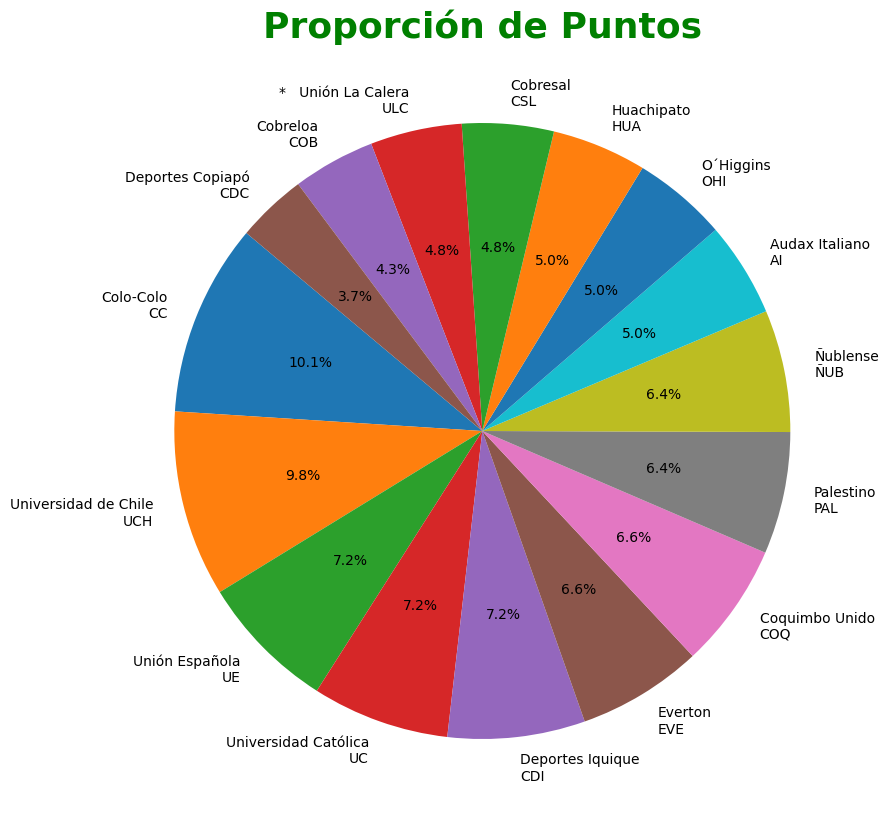

In [9]:
#gráfico de pastel del porcentaje de los puntos ganados
plt.figure(figsize=(10,10))
plt.pie(df_cam["puntos"], labels=df_cam["club"], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Puntos', color='g', fontsize=26, fontweight='bold')

Árbol de Decisión:
RMSE: 0.00
MAE: 0.00
R^2: 1.00

Regresión Lineal:
RMSE: 0.00
MAE: 0.00
R^2: 1.00


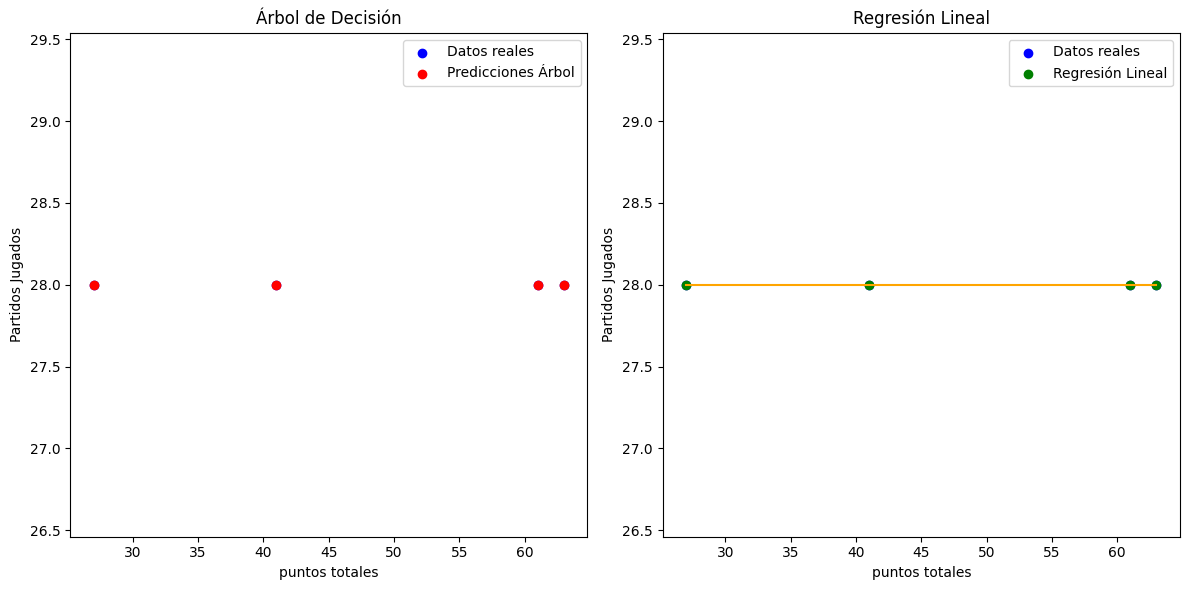

In [10]:
#modelos de desición de árbol y regresión lineal

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_cam[['puntos']], df_cam['pj'], test_size=0.2, random_state=42)

# 1. Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 2. Hacer predicciones con el árbol de decisión
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluar el árbol de decisión
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

# 4. Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 5. Hacer predicciones con la regresión lineal
y_pred_linear = linear_model.predict(X_test)

# 6. Evaluar la regresión lineal
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# 7. Resultados de la evaluación
print("Árbol de Decisión:")
print(f"RMSE: {tree_rmse:.2f}")
print(f"MAE: {tree_mae:.2f}")
print(f"R^2: {tree_r2:.2f}")

print("\nRegresión Lineal:")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R^2: {linear_r2:.2f}")

# 8. Visualización de los resultados
plt.figure(figsize=(12, 6))

# Graficar el árbol de decisión
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicciones Árbol')
plt.title('Árbol de Decisión')
plt.xlabel('puntos totales')
plt.ylabel('Partidos Jugados')
plt.legend()

# Graficar la regresión lineal
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_linear, color='green', label='Regresión Lineal')
plt.plot(X_test, linear_model.predict(X_test), color='orange')  # Línea de la regresión
plt.title('Regresión Lineal')
plt.xlabel('puntos totales')
plt.ylabel('Partidos Jugados')
plt.legend()

plt.tight_layout()
plt.show()

**Condiciones para ser Campeón**

In [15]:


# Puntos actuales
puntos_colocolo = 63
puntos_u = 61

# Posibles resultados de los partidos: G (Ganar), E (Empatar), P (Perder)
resultados = ['G', 'E', 'P']

# Contadores para los casos
total_casos = 0
casos_campeon_colocolo = 0
casos_campeon_u = 0
casos_empate = 0

# Generar combinaciones de resultados para Colo Colo (2 partidos)
for colo_colos_resultados in itertools.product(resultados, repeat=2):
    # Calcular puntos de Colo Colo según los resultados
    puntos_colocolo_final = puntos_colocolo
    for resultado in colo_colos_resultados:
        if resultado == 'G':
            puntos_colocolo_final += 3
        elif resultado == 'E':
            puntos_colocolo_final += 1

    # Generar combinaciones de resultados para la U (2 partidos)
    for u_resultados in itertools.product(resultados, repeat=2):
        # Calcular puntos de la U según los resultados
        puntos_u_final = puntos_u
        for resultado in u_resultados:
            if resultado == 'G':
                puntos_u_final += 3
            elif resultado == 'E':
                puntos_u_final += 1

        # Contar el caso
        total_casos += 1

        # Verificar quién es campeón o si hay empate
        if puntos_colocolo_final > puntos_u_final:
            casos_campeon_colocolo += 1
        elif puntos_u_final > puntos_colocolo_final:
            casos_campeon_u += 1
        else:
            casos_empate += 1

# Calcular las probabilidades
probabilidad_campeon_colocolo = casos_campeon_colocolo / total_casos
probabilidad_campeon_u = casos_campeon_u / total_casos
probabilidad_empate = casos_empate / total_casos

# print(f"Total de casos posibles: {total_casos}")
# print(f"Casos en los que Colo Colo es campeón: {casos_campeon_colocolo}")
print(f"Probabilidad de que Colo Colo sea campeón: {probabilidad_campeon_colocolo*100:.2f}")

#print(f"Casos en los que la U es campeona: {casos_campeon_u}")
print(f"Probabilidad de que la U sea campeona: {probabilidad_campeon_u*100:.2f}")

#print(f"Casos en los que terminan empatados: {casos_empate}")
print(f"Probabilidad de que empaten en puntos: {probabilidad_empate*100:.2f}")


Probabilidad de que Colo Colo sea campeón: 71.60
Probabilidad de que la U sea campeona: 17.28
Probabilidad de que empaten en puntos: 11.11


**Determinamos la porbabilidad de los posibles campeones**

In [14]:


# Puntos actuales
equipos = {
    "AI": df_cam["puntos"].iloc[9],
    "OH": df_cam["puntos"].iloc[10],
    "HUA": df_cam["puntos"].iloc[11],
    "CSL": df_cam["puntos"].iloc[12],
    "ULC": df_cam["puntos"].iloc[13],
    "COB": df_cam["puntos"].iloc[14],
    "CDC": df_cam["puntos"].iloc[15]
}

# Resultados posibles de los partidos: G (Ganar), E (Empatar), P (Perder)
resultados = ['G', 'E', 'P']

# Contadores para descensos
total_casos = 0
descensos = {equipo: 0 for equipo in equipos}

# Simulación de los resultados (2 partidos por equipo)
for resultados_AI in itertools.product(resultados, repeat=2):
    for resultados_Oh in itertools.product(resultados, repeat=2):
        for resultados_HU in itertools.product(resultados, repeat=2):
            for resultados_CSL in itertools.product(resultados, repeat=2):
                for resultados_ULC in itertools.product(resultados, repeat=2):
                    for resultados_CO in itertools.product(resultados, repeat=2):
                        for resultados_CDC in itertools.product(resultados, repeat=2):
                            # Calcular puntos finales
                            puntos_finales = {equipo: equipos[equipo] for equipo in equipos}

                            # Función para actualizar puntos según el resultado
                            def actualizar_puntos(equipo, resultado):
                                if resultado == 'G':
                                    puntos_finales[equipo] += 3
                                elif resultado == 'E':
                                    puntos_finales[equipo] += 1

                            # Actualizar puntos según los resultados simulados
                            actualizar_puntos("AI", resultados_AI[0])
                            actualizar_puntos("AI", resultados_AI[1])
                            actualizar_puntos("OH", resultados_Oh[0])
                            actualizar_puntos("OH", resultados_Oh[1])
                            actualizar_puntos("HUA", resultados_HU[0])
                            actualizar_puntos("HUA", resultados_HU[1])
                            actualizar_puntos("CSL", resultados_CSL[0])
                            actualizar_puntos("CSL", resultados_CSL[1])
                            actualizar_puntos("ULC", resultados_ULC[0])
                            actualizar_puntos("ULC", resultados_ULC[1])
                            actualizar_puntos("COB", resultados_CO[0])
                            actualizar_puntos("COB", resultados_CO[1])
                            actualizar_puntos("CDC", resultados_CDC[0])
                            actualizar_puntos("CDC", resultados_CDC[1])

                            # Ordenar por puntos finales y obtener los dos últimos
                            equipos_ordenados = sorted(puntos_finales.items(), key=lambda x: x[1])
                            descendidos = [equipos_ordenados[0][0], equipos_ordenados[1][0]]

                            # Contar descenso para cada equipo
                            for equipo in descendidos:
                                descensos[equipo] += 1

                            total_casos += 1

# Calcular probabilidades de descenso
probabilidades_descenso = {equipo: descensos[equipo] / total_casos for equipo in equipos}

# Mostrar resultados
print(f"Total de casos posibles: {total_casos}")
for equipo, probabilidad in probabilidades_descenso.items():
    print(f"Probabilidad de que {equipo} descienda: {probabilidad*100:.2f}")


Total de casos posibles: 4782969
Probabilidad de que AI descienda: 3.96
Probabilidad de que OH descienda: 3.39
Probabilidad de que HUA descienda: 2.92
Probabilidad de que CSL descienda: 11.28
Probabilidad de que ULC descienda: 9.30
Probabilidad de que COB descienda: 69.15
Probabilidad de que CDC descienda: 100.00
